In [6]:
# # pip install lifelines --user
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("lung.csv", index_col = 0)
data.head()

,inst,t1me,status,age,sex,myc,smok1ng,gene_alterat1on_status,patholog1cal_stage,pstage_1or2
1,GSM773540,437,1,55,1,0.0,0,0,2,2
2,GSM773541,743,0,38,1,0.0,1,0,2,2
3,GSM773542,2601,0,30,0,0.0,1,0,2,2
4,GSM773543,1173,0,64,1,NaN,0,0,2,2
5,GSM773544,2369,0,63,1,0.0,0,0,2,2


In [8]:
data.shape

(226, 10)

In [9]:
data.dtypes

inst                       object
t1me                        int64
status                      int64
age                         int64
sex                         int64
myc                       float64
smok1ng                     int64
gene_alterat1on_status      int64
patholog1cal_stage          int64
pstage_1or2                 int64
dtype: object

In [10]:
data = data[['t1me', 'status', 'age', 'sex', 'myc', 'smok1ng','gene_alterat1on_status', 'patholog1cal_stage', 'pstage_1or2']]
data["status"] = data["status"] - 1
data["sex"] = data["sex"] - 1
data.head()

,t1me,status,age,sex,myc,smok1ng,gene_alterat1on_status,patholog1cal_stage,pstage_1or2
1,437,0,55,0,0.0,0,0,2,2
2,743,-1,38,0,0.0,1,0,2,2
3,2601,-1,30,-1,0.0,1,0,2,2
4,1173,-1,64,0,NaN,0,0,2,2
5,2369,-1,63,0,0.0,0,0,2,2


In [11]:
data.isnull().sum()

t1me                      0
status                    0
age                       0
sex                       0
myc                       2
smok1ng                   0
gene_alterat1on_status    0
patholog1cal_stage        0
pstage_1or2               0
dtype: int64

In [12]:
data.columns

Index(['t1me', 'status', 'age', 'sex', 'myc', 'smok1ng',
       'gene_alterat1on_status', 'patholog1cal_stage', 'pstage_1or2'],
      dtype='object')

In [13]:
# 直接替换整列
data["smok1ng"] = data["smok1ng"].fillna(data["smok1ng"].mean())
data["gene_alterat1on_status"] = data["gene_alterat1on_status"].fillna(data["gene_alterat1on_status"].mean())
data["patholog1cal_stage"] = data["patholog1cal_stage"].fillna(data["patholog1cal_stage"].mean())
data["pstage_1or2"] = data["pstage_1or2"].fillna(data["pstage_1or2"].mean())
data.dropna(inplace=True)
data["myc"] = data["myc"].astype("int64")

In [14]:
data.isnull().sum()

t1me                      0
status                    0
age                       0
sex                       0
myc                       0
smok1ng                   0
gene_alterat1on_status    0
patholog1cal_stage        0
pstage_1or2               0
dtype: int64

In [15]:
data.shape

(224, 9)

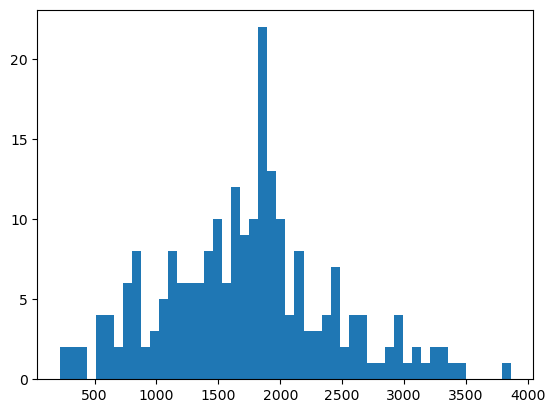

In [16]:
T = data["t1me"]
E = data["status"]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

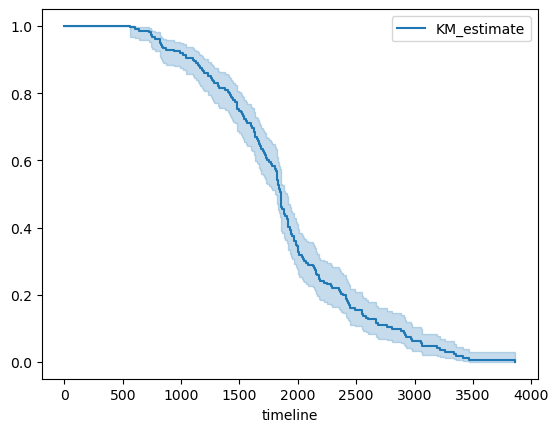

In [17]:
#Fitting a non-parametric model [Kaplan Meier Curve]
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

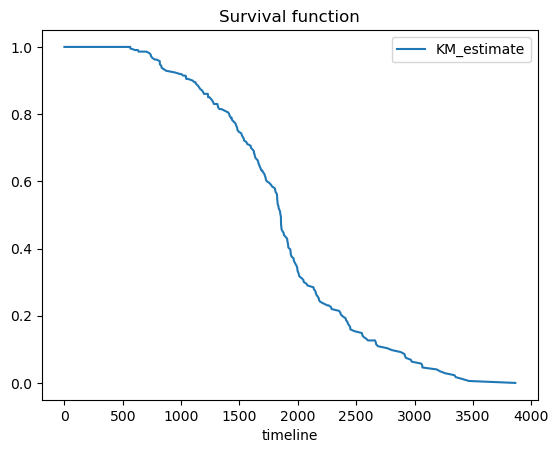

In [18]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

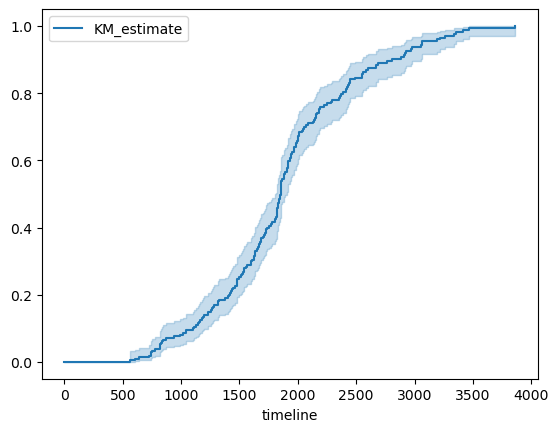

In [19]:
kmf.plot_cumulative_density()

In [20]:
kmf.median_survival_time_

1852.0

In [21]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

1852.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                  1809.0                  1908.0


Text(0.5, 1.0, 'Survival of different gender group')

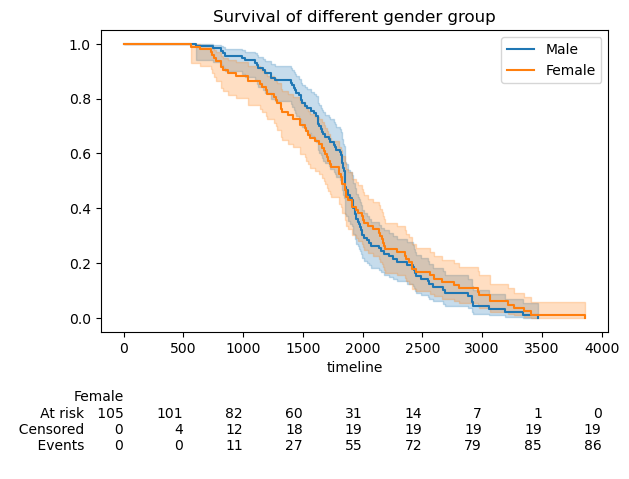

In [22]:
ax = plt.subplot(111)

m = (data["sex"] == 0)

kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)

kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

plt.title("Survival of different gender group")

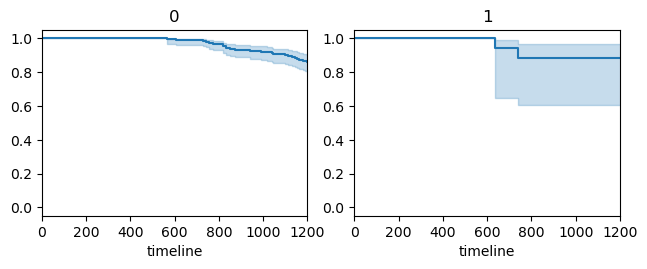

In [23]:
ecog_types = data.sort_values(by = ['myc'])["myc"].unique()

for i, ecog_types in enumerate(ecog_types):
    ax = plt.subplot(2, 2, i + 1)
    ix = data['myc'] == ecog_types
    kmf.fit(T[ix], E[ix], label = ecog_types)
    kmf.plot_survival_function(ax = ax, legend = False)
    plt.title(ecog_types)
    plt.xlim(0, 1200)

plt.tight_layout()